In [ ]:
Author: Pragat Wagle

Assignment 3 Raisin Dataset


In [2]:
import pandas as pd
df = pd.read_excel('Raisin_Dataset.csv')
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Clean Data 
1) As there is no missing values, do not need to fill in any values of the dataframe. If there were missing values I would have used the average, max, or min of that column.

In [3]:
print("Na values")
print(df.isna().sum())

print("\nNull values")
print(df.isnull().sum())

Na values
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Null values
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


### Check For Categorical Data

The number of categorical columns numbers 0 and all of the columns in the dataset are numerical and don't need any transformations relating to categorical variable. 

In [14]:
columns = x.columns
print(columns)
num_cols = df._get_numeric_data().columns

print("\nLength of categorical variables")
print(len(set(columns) - set(num_cols)))

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object')

Length of categorical variables
0


### Split the dataset into training and test sets with 80-20 ratio. (10 points)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Scale the data using Standard Scalar 

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### SVM on 20% Train Test Split

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [6]:
y_preds = classifier.predict(x_test)

#### Predictions

In [7]:
print(y_preds)

['Besni' 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni'
 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen'
 'Besni' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni'
 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 

#### Accuracy Score

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy Score")
accuracy = accuracy_score(y_test, y_preds)
print(str(round(accuracy, 4) * 100) + "%")

Accuracy Score
86.11%


### Visualization 

Text(33.0, 0.5, 'Predicted_False                      Predicted_True')

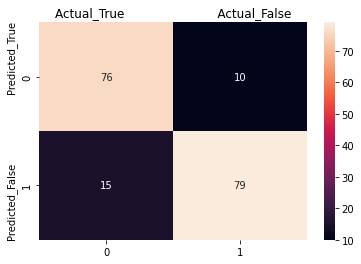

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title('Actual_True                        Actual_False')
ax.set_ylabel('Predicted_False                      Predicted_True')

### Application of Cross-Validation Technique

1) This technique was applied with cross fold values of cv = 2, 4, 6, 8, 10, 15, 20

2) In the first run through the above cross folds: 2 cross fold yielded the best accuracy and lowest standard deviation with the next best being 15 folds but with a standard deviation of about 3.5% higher than when performing with 2 folds. This may have been due to the fact dataset only consisted of 720 rows.

In repeat runs it a cross fold of 6 yields the most accurate value. 

In [10]:
from sklearn.model_selection import cross_val_score
classifier = SVC(kernel = 'linear', random_state = 0)

print("Cross Fold Value : " + str(2))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 2
Accuracy: 87.36 %
Standard Deviation: 0.14 %


In [11]:
print("Cross Fold Value : " + str(4))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 4)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 4
Accuracy: 87.36 %
Standard Deviation: 2.68 %


In [12]:
print("Cross Fold Value : " + str(6))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 6
Accuracy: 87.78 %
Standard Deviation: 2.53 %


In [13]:
print("Cross Fold Value : " + str(8))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 8
Accuracy: 87.22 %
Standard Deviation: 3.14 %


In [14]:
print("Cross Fold Value : " + str(10))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 10
Accuracy: 87.36 %
Standard Deviation: 4.83 %


In [15]:
print("Cross Fold Value : " + str(15))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 15)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 15
Accuracy: 86.94 %
Standard Deviation: 4.90 %


In [16]:
print("Cross Fold Value : " + str(20))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Cross Fold Value : 20
Accuracy: 87.50 %
Standard Deviation: 5.23 %


### SVM on 50% Train Test Split


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [20]:
y_preds = classifier.predict(x_test)

#### Predictions

In [21]:
print(y_preds)

['Besni' 'Kecimen' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni'
 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen'
 'Besni' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Kecimen' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Kecimen' 'Besni'
 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Besni' 'Besni'
 'Kecimen' 'Kecimen' 'Besni' 'Besni' 'Besni' 'Kecimen' 'Besni' 'Besni'
 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Kecimen' 'Besni' 'Bes

#### Accuracy Score

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy Score")
accuracy = accuracy_score(y_test, y_preds)
print(str(round(accuracy, 4) * 100) + "%")

Accuracy Score
86.44%


#### Visualization 

Text(33.0, 0.5, 'Predicted_False                      Predicted_True')

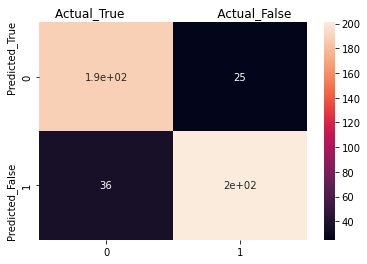

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title('Actual_True                        Actual_False')
ax.set_ylabel('Predicted_False                      Predicted_True')

### Comparsion of Results on 20% vs 50% split

Results of a 20% test split: 86.11%

Results of a 50% test split: 86.44%

The predictive ability of the model on the held out test was slightly higher with a 50% split vs that of a 20% split 